In [32]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from collections import Counter
import os
import imageio
import glob
from torch.utils.data import Dataset, TensorDataset, DataLoader

In [33]:
def plot_dataset(d):
    for clas, data in d.items():
        fig, ax = plt.subplots(1,10)
        fig.suptitle(f'{clas} - {data.shape}')
        plt.gcf().set_size_inches(20, 2)
        imgs = d[clas][np.random.choice(len(d[clas]), 10)]
        for i in range(10):
            ax[i].imshow(imgs[i], cmap='gray')
            ax[i].set_xticks([])
            ax[i].set_yticks([])
        plt.show()

# CIFAR10

In [34]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./dataset', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./dataset', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [35]:
idx_to_class = {v:k for k,v in trainset.class_to_idx.items()}
cifar_train = {}
for idx, clas in idx_to_class.items():
    idxs = np.where(np.array(trainset.targets) == idx)[0]
    if clas == 'automobile':
        cifar_train['car'] = trainset.data[idxs]
    elif clas == 'deer':
        continue
    else:
        cifar_train[clas] = trainset.data[idxs]

In [36]:
print("Image shape:", cifar_train['airplane'].shape[1:])
print("No. classes:", len(cifar_train.keys()))
print("Classes:", ', '.join(cifar_train.keys()))
print("Count per class:")
size = 0
for category, data in cifar_train.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (32, 32, 3)
No. classes: 9
Classes: airplane, car, bird, cat, dog, frog, horse, ship, truck
Count per class:
   airplane - 5000
   car - 5000
   bird - 5000
   cat - 5000
   dog - 5000
   frog - 5000
   horse - 5000
   ship - 5000
   truck - 5000
Dataset size: 45000


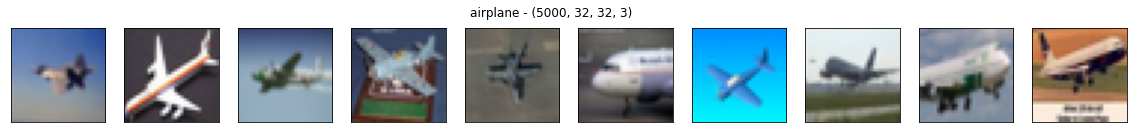

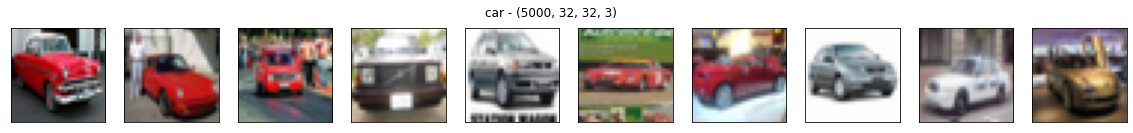

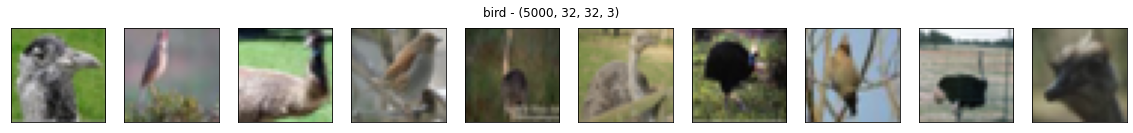

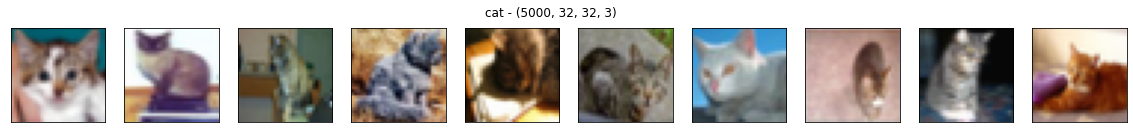

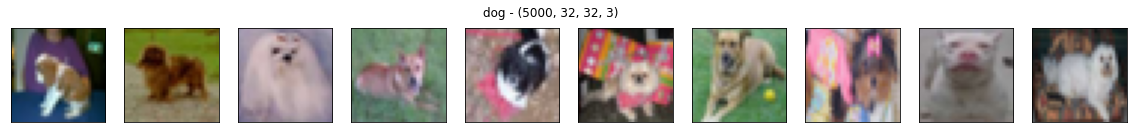

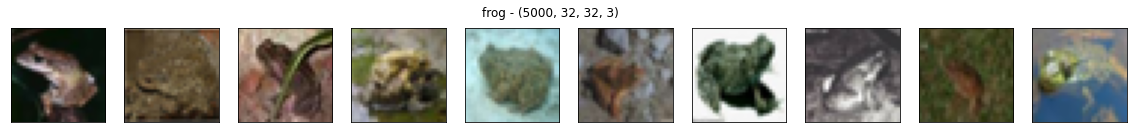

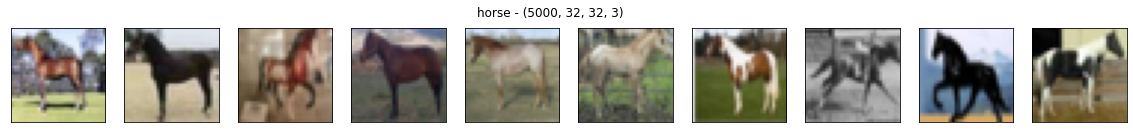

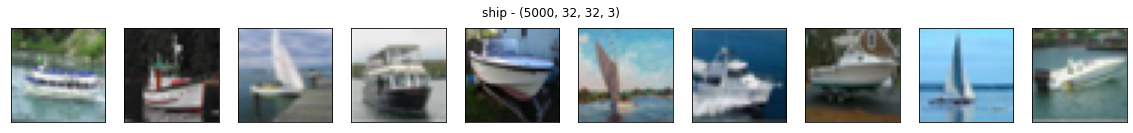

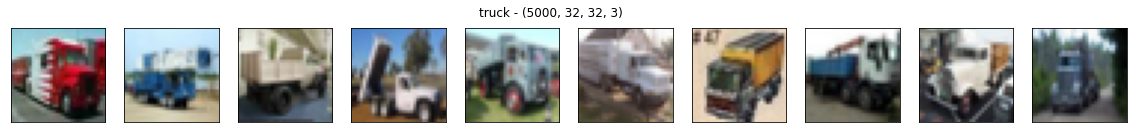

In [37]:
plot_dataset(cifar_train)

In [38]:
idx_to_class = {v:k for k,v in testset.class_to_idx.items()}
cifar_test = {}
for idx, clas in idx_to_class.items():
    idxs = np.where(np.array(testset.targets) == idx)[0]
    if clas == 'automobile':
        cifar_test['car'] = trainset.data[idxs]
    elif clas == 'deer':
        continue
    else:
        cifar_test[clas] = testset.data[idxs]

In [39]:
print("Image shape:", cifar_test['airplane'].shape[1:])
print("No. classes:", len(cifar_test.keys()))
print("Classes:", ', '.join(cifar_test.keys()))
print("Count per class:")
size = 0
for category, data in cifar_test.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (32, 32, 3)
No. classes: 9
Classes: airplane, car, bird, cat, dog, frog, horse, ship, truck
Count per class:
   airplane - 1000
   car - 1000
   bird - 1000
   cat - 1000
   dog - 1000
   frog - 1000
   horse - 1000
   ship - 1000
   truck - 1000
Dataset size: 9000


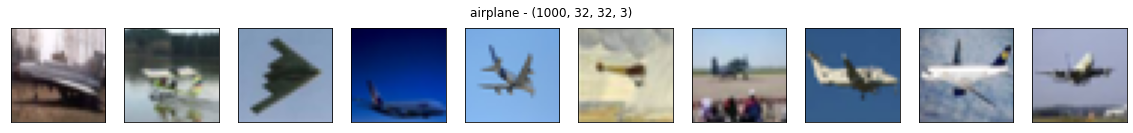

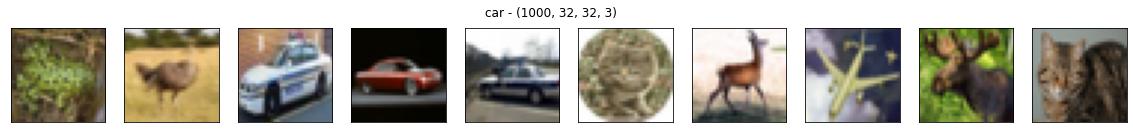

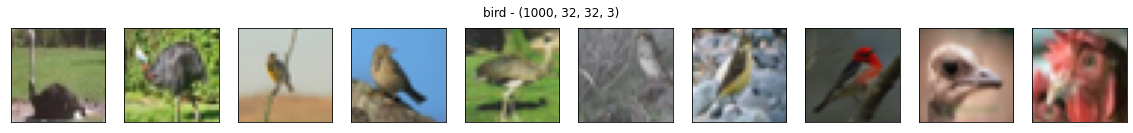

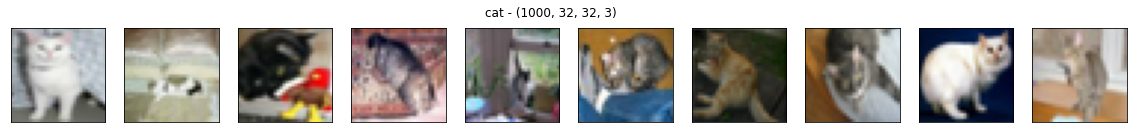

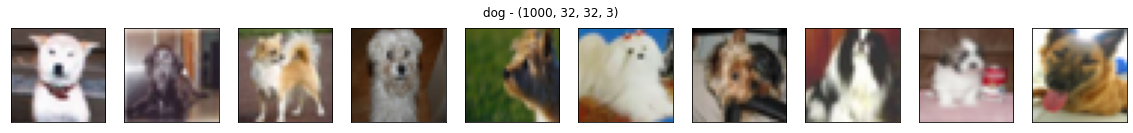

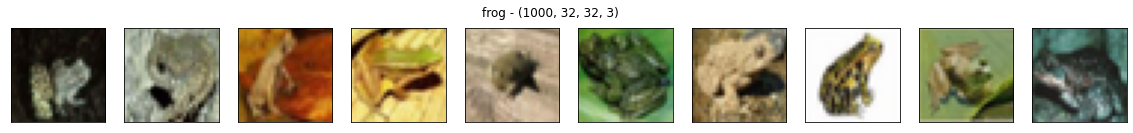

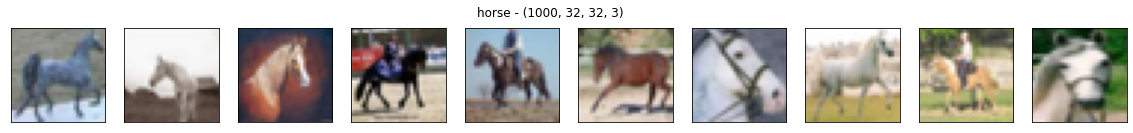

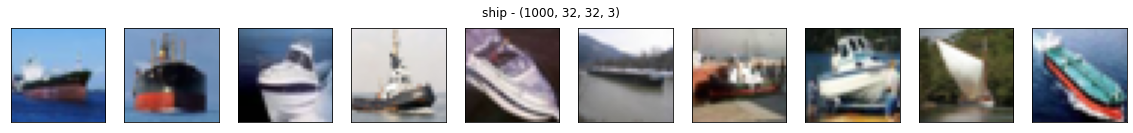

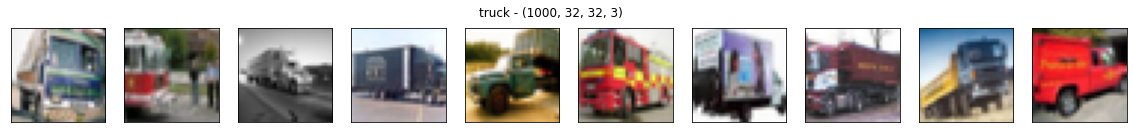

In [40]:
plot_dataset(cifar_test)

# QuickDraw

In [41]:
categories = ['airplane', 'bird', 'car', 'cat', 'cruise ship', 'dog', 'frog', 'horse', 'truck']
quickdraw = {}
for c in categories:
    if c == 'cruise ship':
        quickdraw['ship'] = 255 - np.load(f'dataset/quickdraw/{c}.npy').reshape((-1, 28, 28))
    else:
        quickdraw[c] = 255 - np.load(f'dataset/quickdraw/{c}.npy').reshape((-1, 28, 28))

In [42]:
print("Image shape:", quickdraw['airplane'].shape[1:])
print("No. classes:", len(quickdraw.keys()))
print("Classes:", ', '.join(quickdraw.keys()))
print("Count per class:")
size = 0
for category, data in quickdraw.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (28, 28)
No. classes: 9
Classes: airplane, bird, car, cat, ship, dog, frog, horse, truck
Count per class:
   airplane - 151623
   bird - 133572
   car - 182764
   cat - 123202
   ship - 123410
   dog - 152159
   frog - 159047
   horse - 178286
   truck - 131354
Dataset size: 1335417


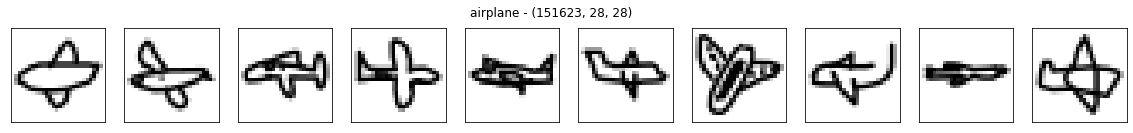

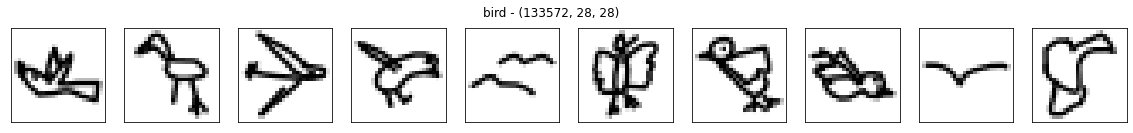

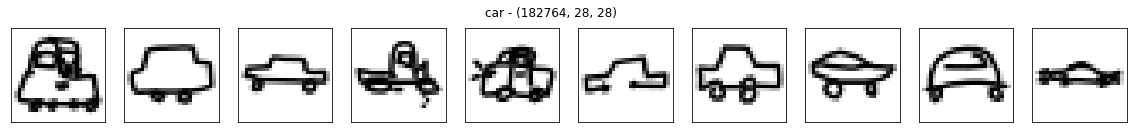

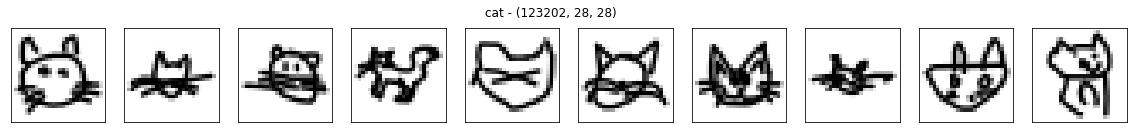

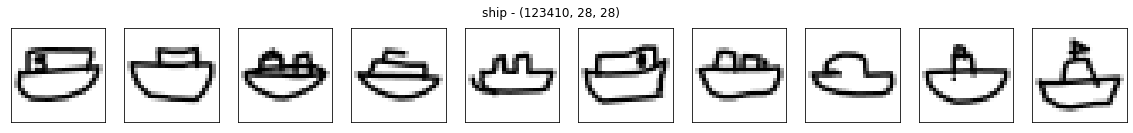

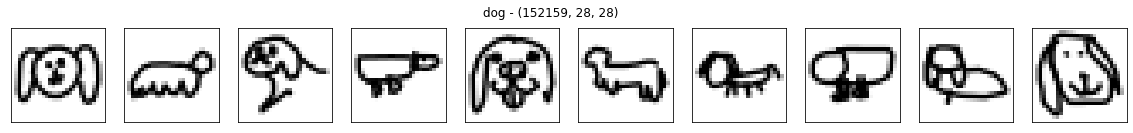

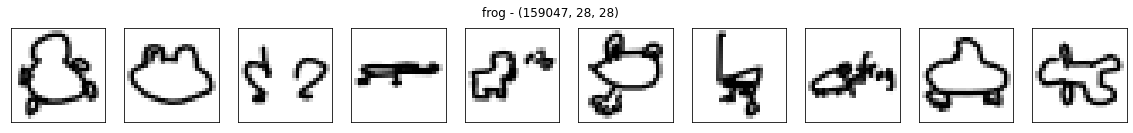

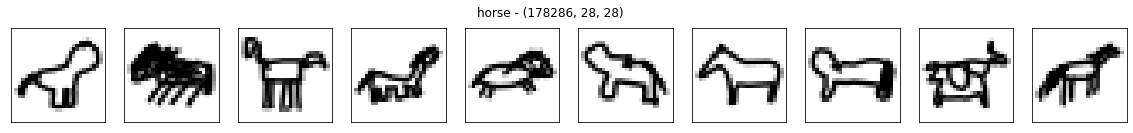

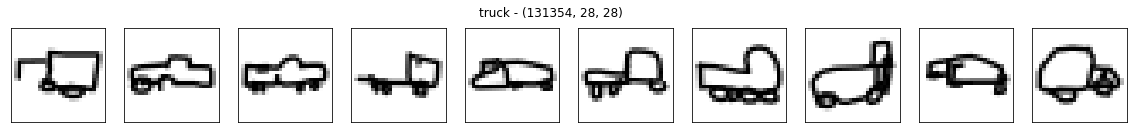

In [43]:
plot_dataset(quickdraw)

# Sketchy - Real

In [44]:
sketchy_categories = ['airplane', 'car_(sedan)', 'cat', 'dog', 'frog', 'horse', 'pickup_truck', 'songbird', 'wading_bird']

In [45]:
info = [
    'invalid-ambiguous.txt',
    'invalid-context.txt',
    'invalid-error.txt',
    'invalid-pose.txt']

remove = []
for i in info:
    with open(f'dataset/sketchy/info/{i}', 'r') as f:
        remove += f.read().splitlines()

In [46]:
sketchy_real = {}
for c in sketchy_categories:
    imgs = []
    for f in glob.glob(f"dataset/sketchy/photo/tx_000100000000/{c}/*.jpg"):
        name = f[f.index('\\')+1:-4]
        if name in remove:
            print(name)
            continue
        imgs.append(imageio.imread(f))
    if c == 'car_(sedan)':
        sketchy_real['car'] = np.asarray(imgs)
    elif c == 'pickup_truck':
        sketchy_real['truck'] = np.asarray(imgs)
    elif c == 'songbird':
        sketchy_real['bird'] = np.asarray(imgs)
    elif c == 'wading_bird':
        np.append(sketchy_real['bird'], np.asarray(imgs))
    else:
        sketchy_real[c] = np.asarray(imgs)

In [47]:
print("Image shape:", sketchy_real['airplane'].shape[1:])
print("No. classes:", len(sketchy_real.keys()))
print("Classes:", ', '.join(sketchy_real.keys()))
print("Count per class:")
size = 0
for category, data in sketchy_real.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (256, 256, 3)
No. classes: 8
Classes: airplane, car, cat, dog, frog, horse, truck, bird
Count per class:
   airplane - 100
   car - 100
   cat - 100
   dog - 100
   frog - 100
   horse - 100
   truck - 100
   bird - 100
Dataset size: 800


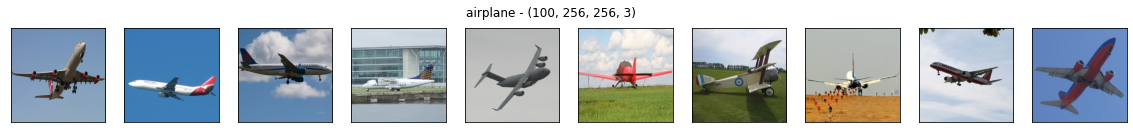

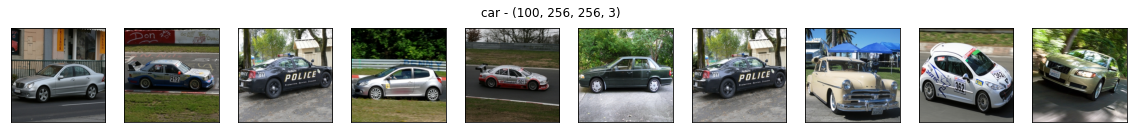

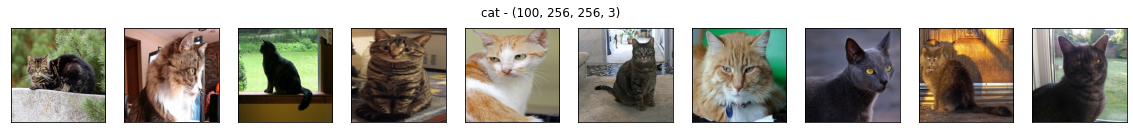

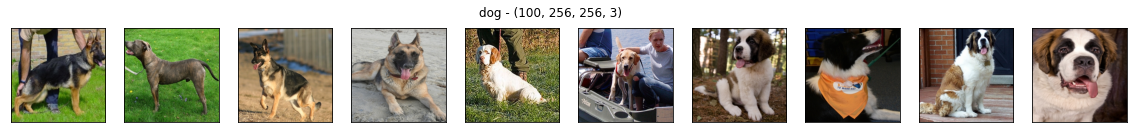

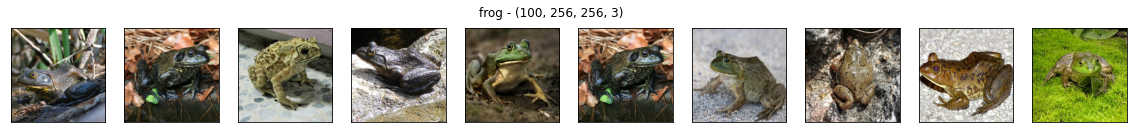

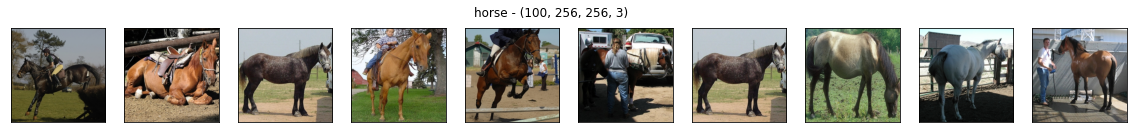

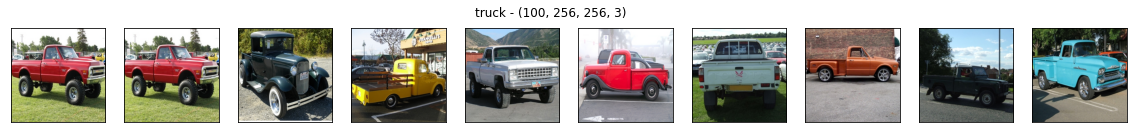

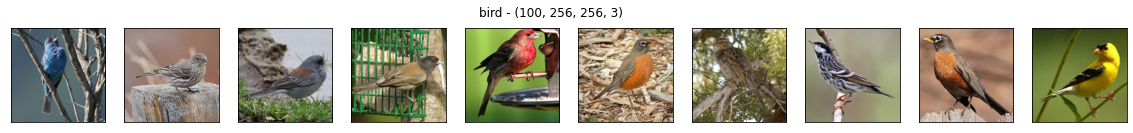

In [48]:
plot_dataset(sketchy_real)

In [49]:
sketchy_doodle = {}
for c in sketchy_categories:
    imgs = []
    for f in glob.glob(f"dataset/sketchy/sketch/tx_000000000000/{c}/*.png"):
        name = f[f.index('\\')+1:-4]
        if name in remove:
            continue
        imgs.append(imageio.imread(f))
    if c == 'car_(sedan)':
        sketchy_doodle['car'] = np.asarray(imgs)[:,:,:,0]
    elif c == 'pickup_truck':
        sketchy_doodle['truck'] = np.asarray(imgs)[:,:,:,0]
    elif c == 'songbird':
        sketchy_doodle['bird'] = np.asarray(imgs)[:,:,:,0]
    elif c == 'wading_bird':
        np.append(sketchy_doodle['bird'], np.asarray(imgs)[:,:,:,0])
    else:
        sketchy_doodle[c] = np.asarray(imgs)[:,:,:,0]

In [50]:
print("Image shape:", sketchy_doodle['airplane'].shape[1:])
print("No. classes:", len(sketchy_doodle.keys()))
print("Classes:", ', '.join(sketchy_doodle.keys()))
print("Count per class:")
size = 0
for category, data in sketchy_doodle.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (256, 256)
No. classes: 8
Classes: airplane, car, cat, dog, frog, horse, truck, bird
Count per class:
   airplane - 528
   car - 534
   cat - 512
   dog - 512
   frog - 502
   horse - 525
   truck - 524
   bird - 504
Dataset size: 4141


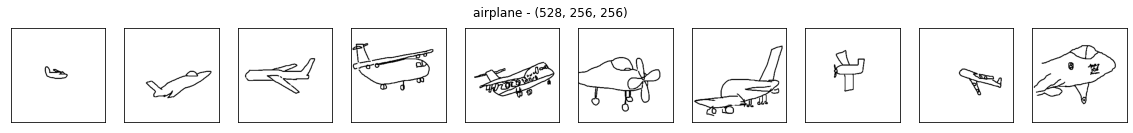

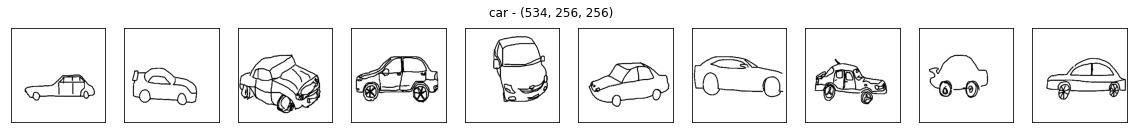

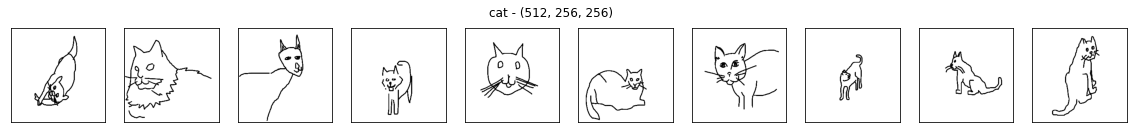

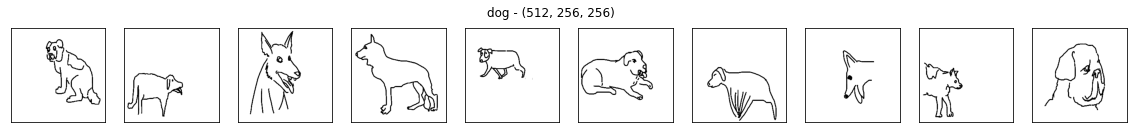

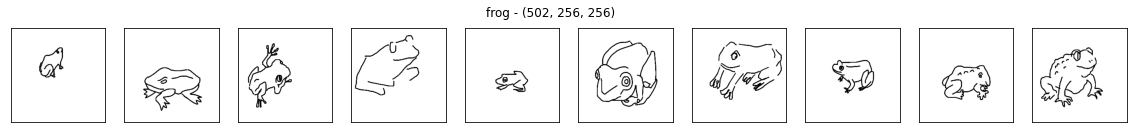

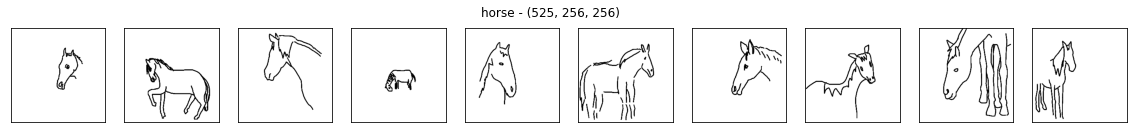

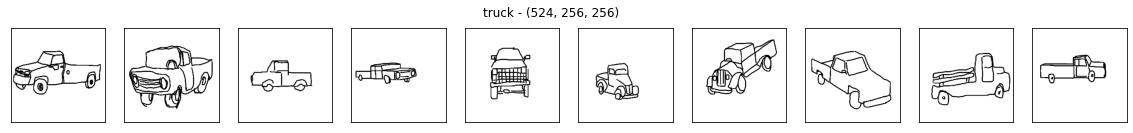

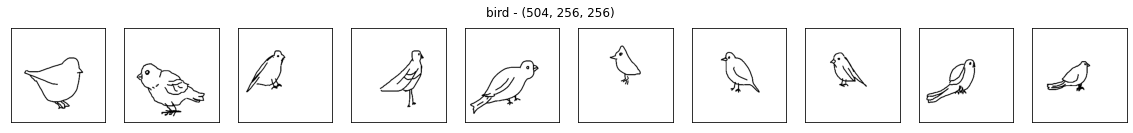

In [51]:
plot_dataset(sketchy_doodle)

# TUBerlin

In [52]:
tuberlin_categories = ['airplane', 'car (sedan)', 'cat', 'dog', 'flying bird', 'frog', 'horse', 'pickup truck', 'race car', 'standing bird', 'truck']

In [53]:
tuberlin = {}
for c in tuberlin_categories:
    imgs = []
    for f in glob.glob(f"dataset/tuberlin/{c}/*.png"):
        imgs.append(imageio.imread(f))
    if c == 'car (sedan)':
        tuberlin['car'] = np.asarray(imgs)
    elif c == 'race car':
        np.append(tuberlin['car'], np.asarray(imgs))
    elif c == 'flying bird':
        tuberlin['bird'] = np.asarray(imgs)
    elif c == 'standing bird':
        np.append(tuberlin['bird'], np.asarray(imgs))
    elif c == 'pickup truck':
        tuberlin['truck'] = np.asarray(imgs)
    elif c == 'truck':
        tuberlin['truck'] = np.asarray(imgs)
        np.append(tuberlin['truck'], np.asarray(imgs))
    else:
        tuberlin[c] = np.asarray(imgs)

In [54]:
print("Image shape:", tuberlin['airplane'].shape[1:])
print("No. classes:", len(tuberlin.keys()))
print("Classes:", ', '.join(tuberlin.keys()))
print("Count per class:")
size = 0
for category, data in tuberlin.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (1111, 1111)
No. classes: 8
Classes: airplane, car, cat, dog, bird, frog, horse, truck
Count per class:
   airplane - 80
   car - 80
   cat - 80
   dog - 80
   bird - 80
   frog - 80
   horse - 80
   truck - 80
Dataset size: 640


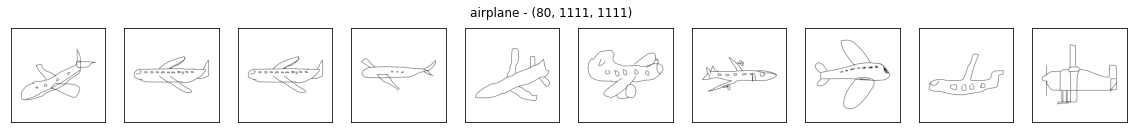

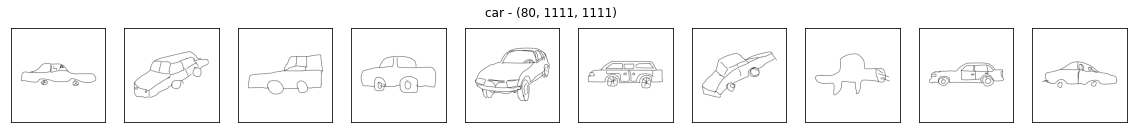

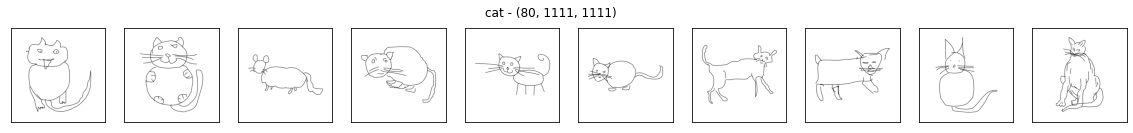

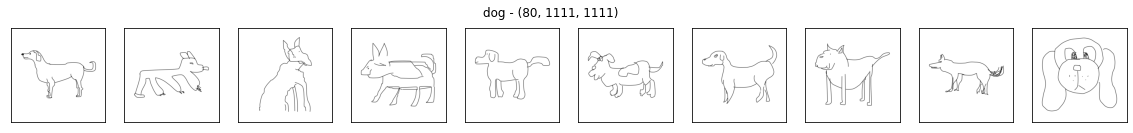

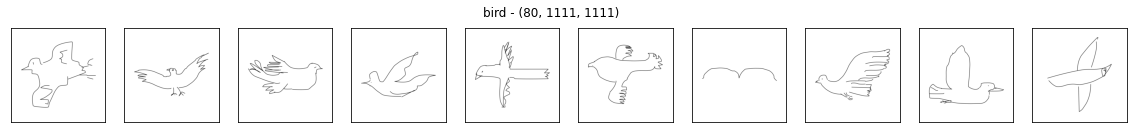

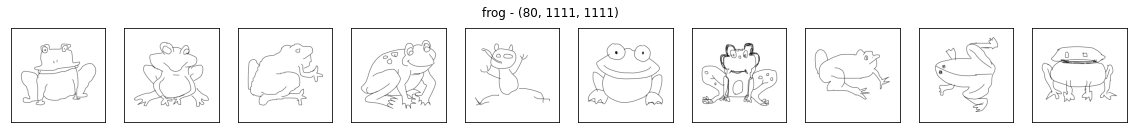

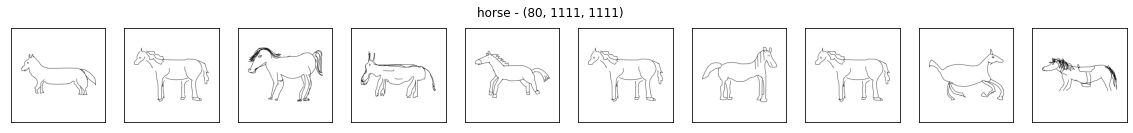

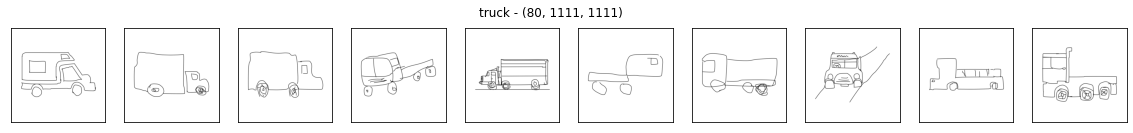

In [55]:
plot_dataset(tuberlin)

# Google Doodles

In [68]:
google_doodles = np.load('dataset/google_images/google_doodles.npy', allow_pickle=True)[()]

In [69]:
print("Image shape:", google_doodles['airplane'].shape[1:])
print("No. classes:", len(google_doodles.keys()))
print("Classes:", ', '.join(google_doodles.keys()))
print("Count per class:")
size = 0
for category, data in google_doodles.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (256, 256)
No. classes: 9
Classes: airplane, car, bird, cat, dog, frog, horse, ship, truck
Count per class:
   airplane - 433
   car - 459
   bird - 455
   cat - 456
   dog - 454
   frog - 391
   horse - 459
   ship - 462
   truck - 436
Dataset size: 4005


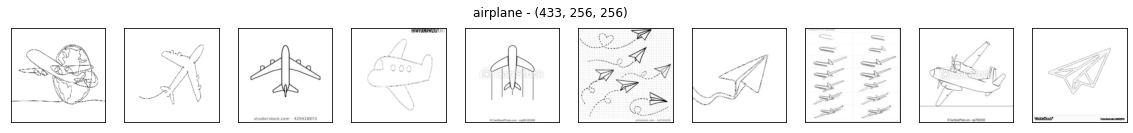

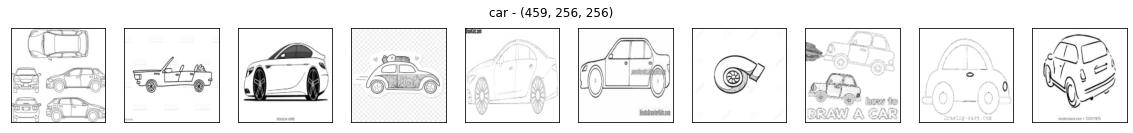

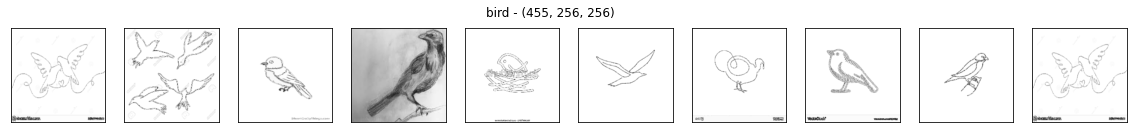

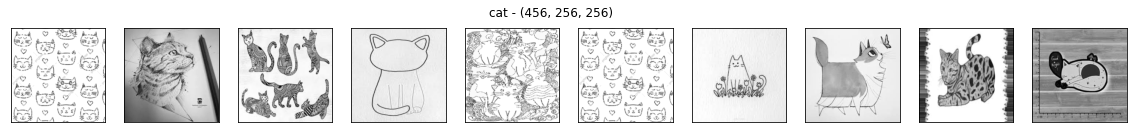

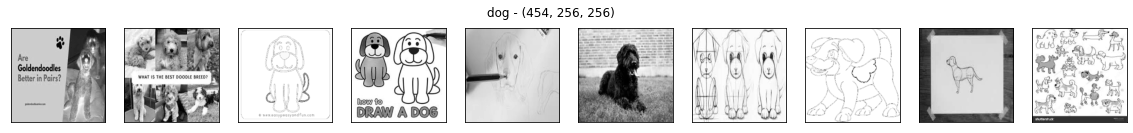

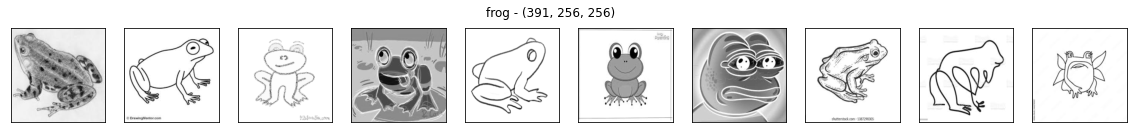

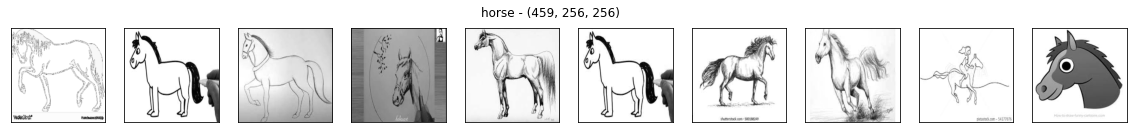

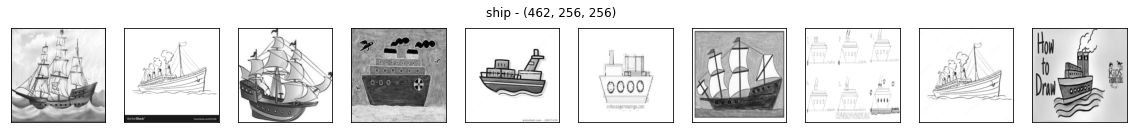

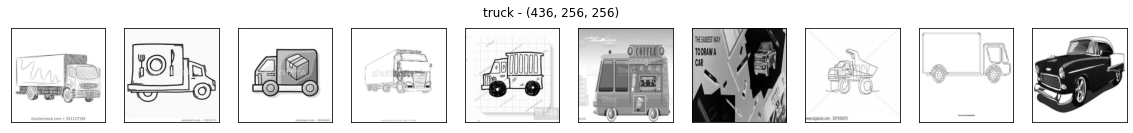

In [70]:
plot_dataset(google_doodles)

# Google Real

In [71]:
google_real = np.load('dataset/google_images/google_real.npy', allow_pickle=True)[()]

In [72]:
print("Image shape:", google_real['airplane'].shape[1:])
print("No. classes:", len(google_real.keys()))
print("Classes:", ', '.join(google_real.keys()))
print("Count per class:")
size = 0
for category, data in google_real.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (256, 256, 3)
No. classes: 9
Classes: airplane, car, bird, cat, dog, frog, horse, ship, truck
Count per class:
   airplane - 105
   car - 100
   bird - 100
   cat - 100
   dog - 100
   frog - 100
   horse - 100
   ship - 100
   truck - 100
Dataset size: 905


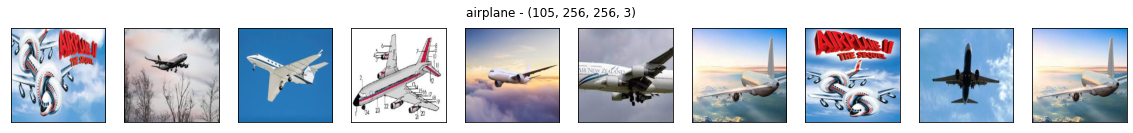

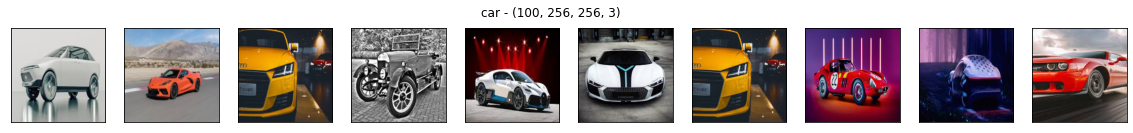

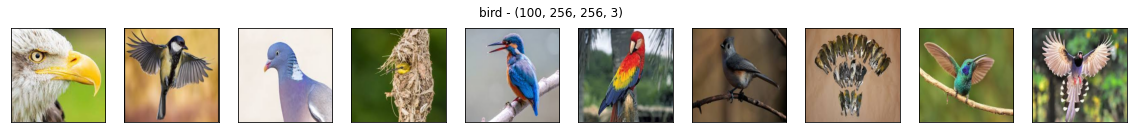

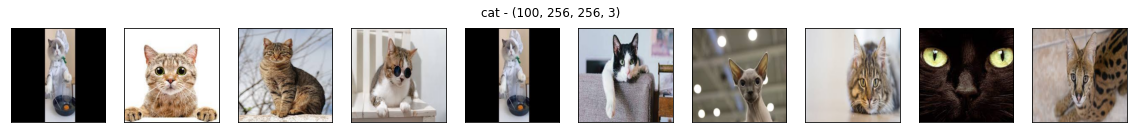

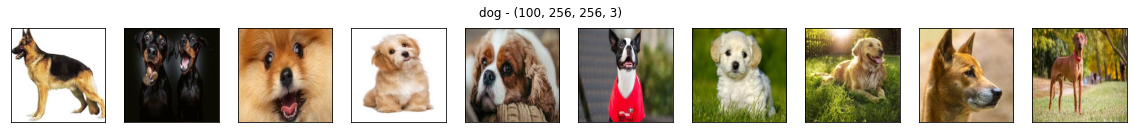

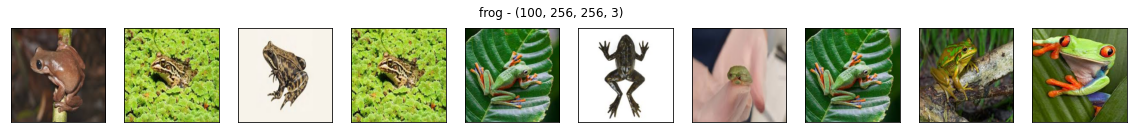

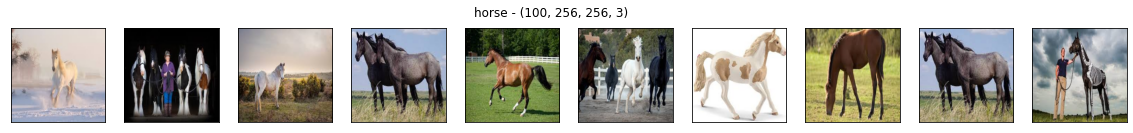

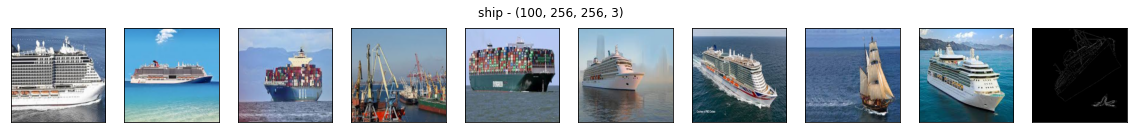

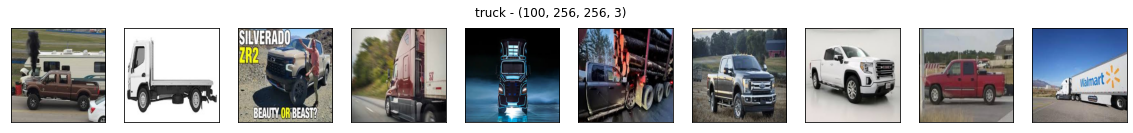

In [73]:
plot_dataset(google_real)

# Save/load datasets

In [74]:
dataset = {
    'cifar_train': cifar_train,
    'cifar_test': cifar_test,
    'quickdraw': quickdraw,
    'sketchy_real': sketchy_real,
    'sketchy_doodle': sketchy_doodle,
    'tuberlin': tuberlin,
    'google_doodles': google_doodles,
    'google_real': google_real,
}

In [83]:
def train_test_split(dataset):
    train_set = {}
    test_set = {}
    for clas, data in dataset.items():
        np.random.shuffle(data)
        n = data.shape[0]
        train, test = data[:int(n*0.8)], data[int(n*0.8):]
        train_set[clas] = train
        test_set[clas] = test
    return train_set, test_set

In [91]:
dataset_train = {}
dataset_test = {}
for name, data in dataset.items():
    train_set, test_set = train_test_split(data)
    dataset_train[name] = train_set
    dataset_test[name] = test_set

In [99]:
np.save("dataset/dataset_train.npy", dataset_train)
np.save("dataset/dataset_test.npy", dataset_test)

In [100]:
dataset_train = np.load('dataset/dataset_train.npy', allow_pickle=True)[()]
dataset_train.keys()

dict_keys(['cifar_train', 'cifar_test', 'quickdraw', 'sketchy_real', 'sketchy_doodle', 'tuberlin', 'google_doodles', 'google_real'])

In [103]:
for name, data in dataset_train.items():
    print(name)
    for clas, d in data.items():
        print(f"\t{clas}: {d.shape[0]}")

cifar_train
	airplane: 4000
	car: 4000
	bird: 4000
	cat: 4000
	dog: 4000
	frog: 4000
	horse: 4000
	ship: 4000
	truck: 4000
cifar_test
	airplane: 800
	car: 800
	bird: 800
	cat: 800
	dog: 800
	frog: 800
	horse: 800
	ship: 800
	truck: 800
quickdraw
	airplane: 121298
	bird: 106857
	car: 146211
	cat: 98561
	ship: 98728
	dog: 121727
	frog: 127237
	horse: 142628
	truck: 105083
sketchy_real
	airplane: 80
	car: 80
	cat: 80
	dog: 80
	frog: 80
	horse: 80
	truck: 80
	bird: 80
sketchy_doodle
	airplane: 422
	car: 427
	cat: 409
	dog: 409
	frog: 401
	horse: 420
	truck: 419
	bird: 403
tuberlin
	airplane: 64
	car: 64
	cat: 64
	dog: 64
	bird: 64
	frog: 64
	horse: 64
	truck: 64
google_doodles
	airplane: 346
	car: 367
	bird: 364
	cat: 364
	dog: 363
	frog: 312
	horse: 367
	ship: 369
	truck: 348
google_real
	airplane: 84
	car: 80
	bird: 80
	cat: 80
	dog: 80
	frog: 80
	horse: 80
	ship: 80
	truck: 80


In [104]:
for name, data in dataset_test.items():
    print(name)
    for clas, d in data.items():
        print(f"\t{clas}: {d.shape[0]}")

cifar_train
	airplane: 1000
	car: 1000
	bird: 1000
	cat: 1000
	dog: 1000
	frog: 1000
	horse: 1000
	ship: 1000
	truck: 1000
cifar_test
	airplane: 200
	car: 200
	bird: 200
	cat: 200
	dog: 200
	frog: 200
	horse: 200
	ship: 200
	truck: 200
quickdraw
	airplane: 30325
	bird: 26715
	car: 36553
	cat: 24641
	ship: 24682
	dog: 30432
	frog: 31810
	horse: 35658
	truck: 26271
sketchy_real
	airplane: 20
	car: 20
	cat: 20
	dog: 20
	frog: 20
	horse: 20
	truck: 20
	bird: 20
sketchy_doodle
	airplane: 106
	car: 107
	cat: 103
	dog: 103
	frog: 101
	horse: 105
	truck: 105
	bird: 101
tuberlin
	airplane: 16
	car: 16
	cat: 16
	dog: 16
	bird: 16
	frog: 16
	horse: 16
	truck: 16
google_doodles
	airplane: 87
	car: 92
	bird: 91
	cat: 92
	dog: 91
	frog: 79
	horse: 92
	ship: 93
	truck: 88
google_real
	airplane: 21
	car: 20
	bird: 20
	cat: 20
	dog: 20
	frog: 20
	horse: 20
	ship: 20
	truck: 20
